## COVID policies and cases

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
covid = pd.read_csv("data/covid.csv")
covid = covid[covid["Location"] != "United States"]
covid["COVID_rate (%)"] = 100*(covid["Oct_2020_Cases"] / covid["Total Population"])

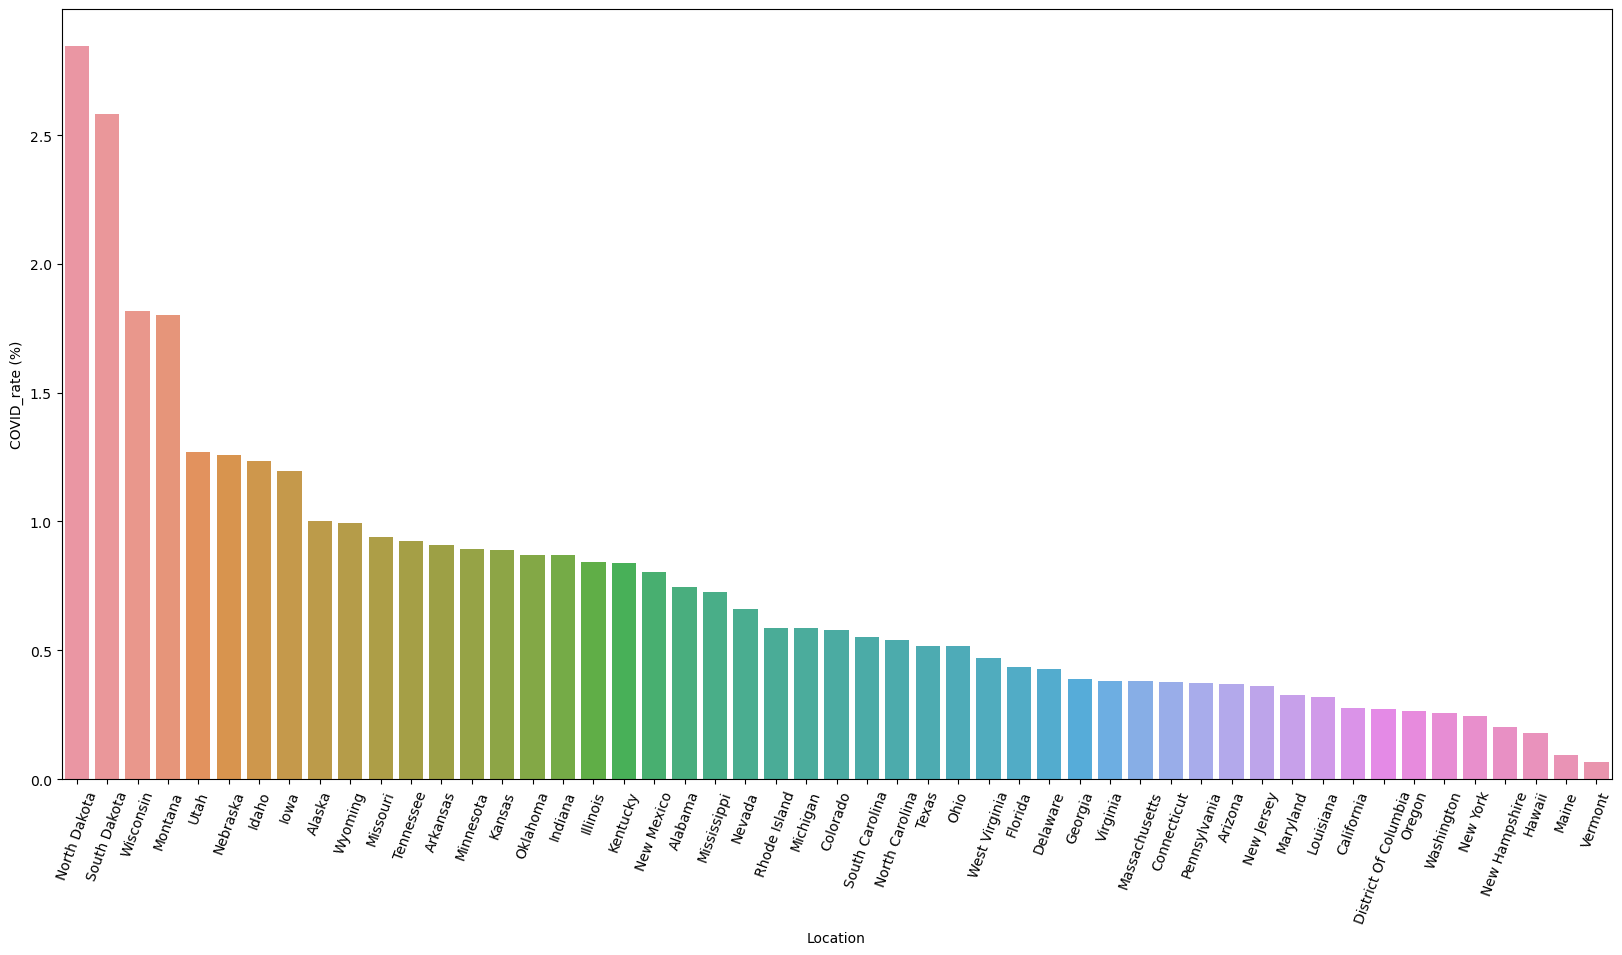

In [69]:
covid_sorted = covid.sort_values("COVID_rate (%)", ascending = False)
covid_sorted.head()

fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=covid_sorted, x="Location", y="COVID_rate (%)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);

array(['No Limit', '>50 Prohibited', 'All Gatherings Prohibited',
       '>10 Prohibited', '>25 Prohibited'], dtype=object)

/tmp/ipykernel_7287/2001235882.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=70);


,COVID_rate (%)
Large Gatherings Ban,
>50 Prohibited,0.923554
>25 Prohibited,0.919531
No Limit,0.906760
>10 Prohibited,0.534330
All Gatherings Prohibited,0.416476


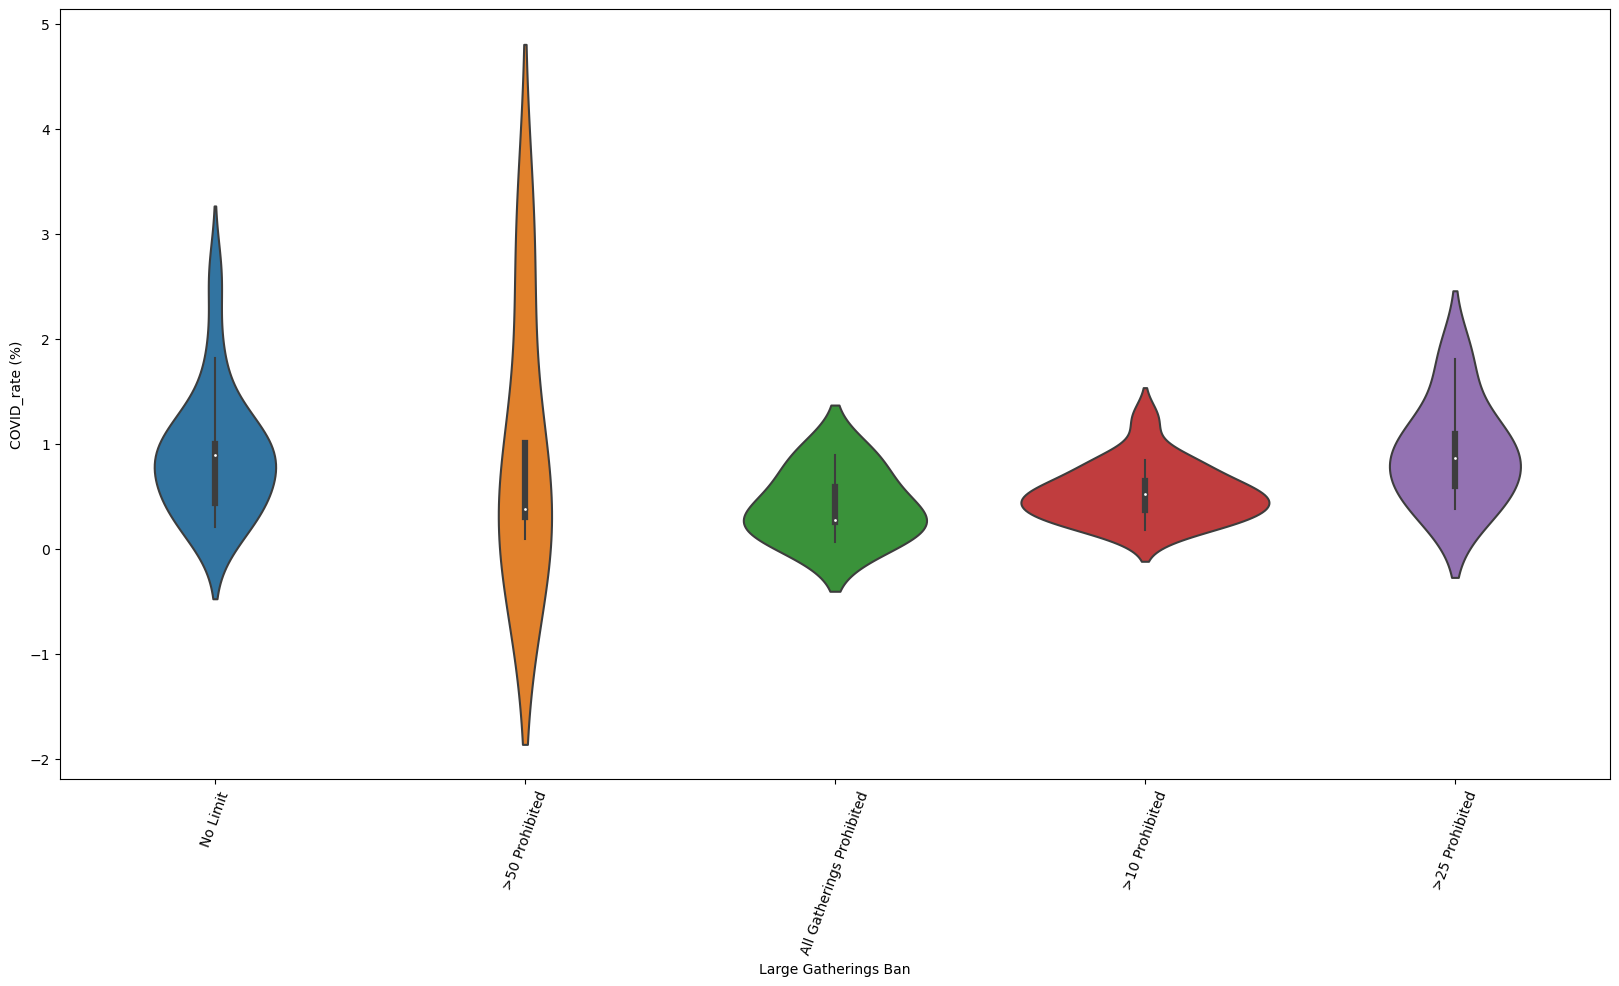

In [72]:
display(covid["Large Gatherings Ban"].unique())
covid_gathering_bans = (pd.DataFrame(covid.groupby("Large Gatherings Ban")["COVID_rate (%)"].mean())
                        .sort_values("COVID_rate (%)", ascending = False))
covid_gathering_bans


fig, ax = plt.subplots(figsize=(20, 10))
#sns.barplot(data=covid_sorted, x="Location", y="COVID_rate (%)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);
sns.violinplot(data=covid, x="Large Gatherings Ban", y="COVID_rate (%)")
#sns.lineplot(
#    x=covid_gathering_bans.index, 
#    y=covid_gathering_bans["COVID_rate (%)"], 
#    style="event"
#)
covid_gathering_bans

In [71]:
features = ["Depression_2020", "Employer", "Medicaid", "Medicare", "Uninsured", "Large Gatherings Ban"]